In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## exercize 1

**Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The alghoritm used is based on the fact that the probability for an atom to decay is equivalent to the percentage of a given number of atoms to decay. Considering the structure of the law that calculates the survived number of atoms, it is easy to see that the number of atoms decaied in certain time is $N_{0}\cdot p(t)$ (where $N_{0}$ is the initial number of atoms and $p(t)$ is the probability to decay at a certain time $t$)

for how many seconds do you want to run the simulation? 200
[[  1   4 996   4]
 [  2   8 992   8]
 [  3  11 989  11]
 [  4  15 985  15]
 [  5  19 981  19]
 [  6  22 978  22]
 [  7  26 974  26]
 [  8  30 970  30]
 [  9  33 967  33]
 [ 10  37 963  37]
 [ 11  41 959  41]
 [ 12  44 956  44]
 [ 13  48 952  48]
 [ 14  52 948  52]
 [ 15  55 945  55]
 [ 16  59 941  59]
 [ 17  62 938  62]
 [ 18  66 934  66]
 [ 19  69 931  69]
 [ 20  73 927  73]
 [ 21  76 924  76]
 [ 22  80 920  80]
 [ 23  83 917  83]
 [ 24  87 913  87]
 [ 25  90 910  90]
 [ 26  94 906  94]
 [ 27  97 903  97]
 [ 28 101 899 101]
 [ 29 104 896 104]
 [ 30 107 893 107]
 [ 31 111 889 111]
 [ 32 114 886 114]
 [ 33 117 883 117]
 [ 34 121 879 121]
 [ 35 124 876 124]
 [ 36 127 873 127]
 [ 37 131 869 131]
 [ 38 134 866 134]
 [ 39 137 863 137]
 [ 40 141 859 141]
 [ 41 144 856 144]
 [ 42 147 853 147]
 [ 43 150 850 150]
 [ 44 153 847 153]
 [ 45 157 843 157]
 [ 46 160 840 160]
 [ 47 163 837 163]
 [ 48 166 834 166]
 [ 49 169 831 169]
 [ 50 172

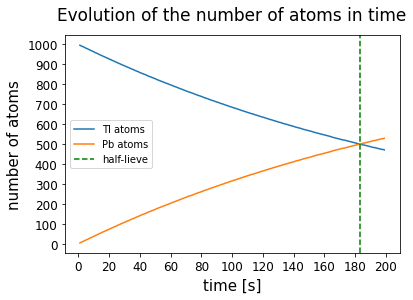

In [2]:
N=input(f'for how many seconds do you want to run the simulation? ')
#print(f'for how many seconds do yiu want to run the simulation:'+N)

Tl=1000 #fix the initial number of Tl atoms
Pb=0    #fix the initial number of Pb atoms
tau=3.052*60 #defining the half-lieve

t=np.arange(1,int(N)) #defining the t steps
ev=[]

def p(x): #defining the probability for an atom to decay
    return (1-2**(-x/tau))


for i in t: # applying the algorithm
    prob=p(i)
    delta=round(prob*1000) #rounding the number of atoms decaied
    
    Pb=delta #calculating the numbers of atoms for each species
    Tl=1000-delta
    
    ev.append([i,delta,Tl,Pb]) #registering the evolution of the system putting the results in an array
    
    
ev=np.asarray(ev)
print(ev)
#plotting the results
plt.plot(ev[:,0],ev[:,2])
plt.plot(ev[:,0],ev[:,3])
plt.xlabel('time [s]', fontsize=15, labelpad=5)
plt.ylabel('number of atoms', fontsize=15, labelpad=5)
plt.title('Evolution of the number of atoms in time', fontsize=17, pad=15)
plt.yticks(np.arange(0,1100,100), size=12)
plt.xticks(np.arange(min(t)-1,max(t)+int(N)/10,int(N)/10), size=12)



if int(N)>=183: plt.axvline(tau, linestyle='--',color='green')
if int(N)>=183: plt.legend(['Tl atoms','Pb atoms','half-lieve'])
if int(N)<183: plt.legend(['Tl atoms','Pb atoms'])

Another possible method is to generate random number ($y$) from a uniform distribution and compare it to $p(t)$. This must be done for each atom and if $y$ is smaller or equal to $p(t)$ the atom is considered decaied.

[[  1   2 998   2]
 [  2  11 989  11]
 [  3  13 987  13]
 [  4   9 991   9]
 [  5  22 978  22]
 [  6  26 974  26]
 [  7  23 977  23]
 [  8  28 972  28]
 [  9  31 969  31]
 [ 10  39 961  39]
 [ 11  41 959  41]
 [ 12  48 952  48]
 [ 13  50 950  50]
 [ 14  48 952  48]
 [ 15  57 943  57]
 [ 16  57 943  57]
 [ 17  56 944  56]
 [ 18  67 933  67]
 [ 19  77 923  77]
 [ 20  71 929  71]
 [ 21  72 928  72]
 [ 22  78 922  78]
 [ 23  88 912  88]
 [ 24  88 912  88]
 [ 25  98 902  98]
 [ 26 116 884 116]
 [ 27  92 908  92]
 [ 28  95 905  95]
 [ 29 109 891 109]
 [ 30  98 902  98]
 [ 31 131 869 131]
 [ 32 118 882 118]
 [ 33 121 879 121]
 [ 34 120 880 120]
 [ 35 104 896 104]
 [ 36 119 881 119]
 [ 37 126 874 126]
 [ 38 142 858 142]
 [ 39 144 856 144]
 [ 40 141 859 141]
 [ 41 150 850 150]
 [ 42 151 849 151]
 [ 43 157 843 157]
 [ 44 140 860 140]
 [ 45 160 840 160]
 [ 46 169 831 169]
 [ 47 161 839 161]
 [ 48 153 847 153]
 [ 49 179 821 179]
 [ 50 141 859 141]
 [ 51 204 796 204]
 [ 52 195 805 195]
 [ 53 210 79

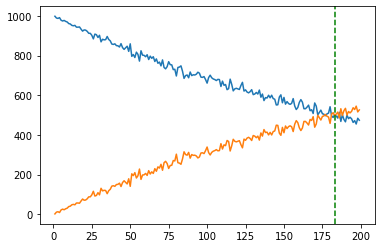

In [3]:
ev=[]
Tl=1000
Pb=0

for i in t: #applying the algorithm
    delta=0
    
    for j in range (0,1000):
        
        y=np.random.random() #generating a random uniformally distributed number
        if y<=p(i):   #compare it with the probability at the fixe
            delta=delta+1
    
    Tl=1000-delta
    Pb=delta
    ev.append([i,delta,Tl,Pb])
    
ev=np.asarray(ev)
print(ev)
plt.plot(ev[:,0],ev[:,2])
plt.plot(ev[:,0],ev[:,3])
if int(N)>=183: plt.axvline(tau, linestyle='--',color='green')

In [4]:
def inverse_cdf(z): #defining the inverse of cdf
    k=(np.log(2)/(tau**2))
    
    return np.log2(1/(1-k*z*np.log(2)))/k

In [5]:
x=np.random.randint(1,N,1000)#creating 1000 numbers uniformally distributed 

t=inverse_cdf(x) #generating the time array using the inverse transform method

In [6]:
t=np.sort(t) #ordering the time array from the smallest to the largest 

In [7]:
Tl=1000*(2**(-t/tau)) #calculating the evolution of the number of atoms of the two species
Pb=1000-Tl

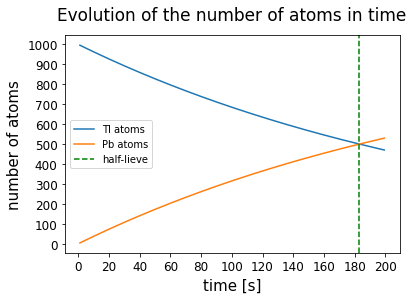

In [8]:
#plotting the result
plt.plot(t,Tl)
plt.plot(t,Pb)
plt.xlabel('time [s]', fontsize=15, labelpad=5)
plt.ylabel('number of atoms', fontsize=15, labelpad=5)
plt.title('Evolution of the number of atoms in time', fontsize=17, pad=15)
plt.yticks(np.arange(0,1100,100), size=12)
plt.xticks(np.arange(min(t)-1,max(t)+int(N)/10,int(N)/10), size=12)

if int(N)>=183: plt.axvline(tau, linestyle='--',color='green')
if int(N)>=183: plt.legend(['Tl atoms','Pb atoms','half-lieve'])
if int(N)<183: plt.legend(['Tl atoms','Pb atoms'])

## exercize 2

**Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [9]:
def teta(b,Z=79, e= -1.602176634*(10**(-19)) , E=7.7, eps=8.854*(10**(-12))): #defining the function to calculate the scattering angle
    E=E*(10**(6))*(1.602176565*(10**(-19)))
    
    return 2*np.arctan((Z*e*e)/(2*np.pi*eps*E*b))
   

In [10]:
n=10**6 #number of particles
a=5.29*(10**(-11)) #Bohr radius 
sigma_sq=(a/100)**2 #square of the sigma

z=np.random.random(n) #generating n uniformally distributed random numbers
r_squared=-2*sigma_sq*np.log(z) #calculating the radius from the Box-Muller method 
angles= 2*np.pi*np.random.random(n)

In [11]:
b=np.sqrt(r_squared) #generating the array of the impact parameter
print(b)

[4.60876351e-13 5.43970786e-13 1.19918169e-12 ... 4.63334997e-13
 6.74831961e-13 1.11867993e-12]


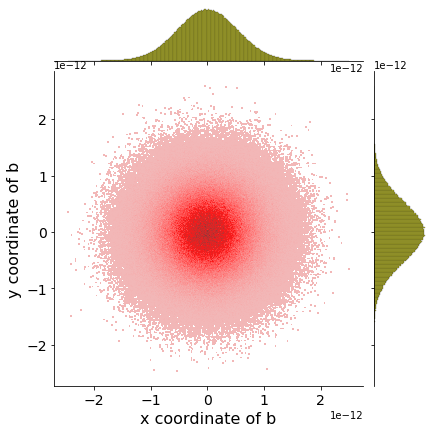

In [12]:
#plotting b
data=pd.DataFrame({'x':b*np.cos(angles), 'y':b*np.sin(angles)})
g=sns.jointplot(data=data, x='x',y='y', kind="hist", color='red', marginal_kws={'color': 'y', 'edgecolor':"black", 'linewidth':0.2})

g.set_axis_labels("x coordinate of b", "y coordinate of b", fontsize=16)
g.ax_joint.tick_params(axis='x', labelsize=14)
g.ax_joint.tick_params(axis='y', labelsize=14)

In [13]:
ang=np.asarray(teta(b)) #calculating the angles for each b value

In [14]:
print(f'the percentage of particles bouncing back is: {len(ang[ang>(np.pi/2)])*100/n} %') 

the percentage of particles bouncing back is: 0.1635 %


## exercize 3 

**Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [15]:
def f(x): #defining the needed function
    return (np.sin(1/(x*(2-x))))**2 

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

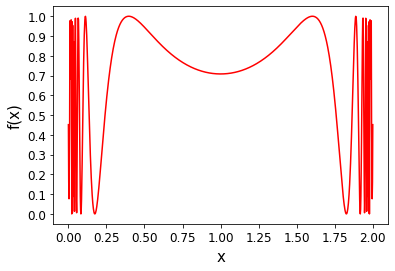

In [16]:
x=np.linspace(0.001,1.999,1000)  
plt.plot(x,f(x),'r-')
plt.xlabel('x', fontsize=15, labelpad=5)
plt.ylabel('f(x)', fontsize=15, labelpad=5)
plt.yticks(np.arange(0,1.1,0.1), size=12)
plt.xticks(size=12)

In [17]:
N=100000
count=0 

#calculating the integral with the hit and miss method
for i in range(N):
    x=2*np.random.random() #generating the needed x array
    y=np.random.random()
    if y<f(x): count+=1
        
I=2*count/N #calculating the integral  

the error is computed using binomial variance equal to $n\cdot p\cdot q$. In this case $n=N$, $p=count/N$, $q=1-p$. This is the variance of the variable count.
In order to calculate the error on the integral I need to permorm the propagation of errors.

In [18]:
# the error is computed using binomial variance=n*p*q in this case n=N, p=count/N, q=1-p 
# this is the variance of the variable count
# in order to calculate the error on the integral I need to permorm the propagation of errors

p=count/N
q=1-p

err_hm=(2/N)*np.sqrt(N*p*q) #calcolo dell'errore
print(f'the integral calculated with the hit and miss method is {I} +- {err_hm}')


the integral calculated with the hit and miss method is 1.4546 +- 0.0028166271318724465


In [19]:
#calculating the integral with the mean value method

x=2*np.random.random(N) #generating the x array and calculating the corresponding value of f(x)
F=f(x) 

I=2*np.sum(F)/N #calculating the integral 

varf=np.sum(F*F)/N-(I/2)**2 #calculating the variance of the function

err_mv=2*np.sqrt(varf)/np.sqrt(N) #calculating the error

print(f' the integral calculated with the mean value method: {I}+-{err_mv}') #

 the integral calculated with the mean value method: 1.451749788011742+-0.0016618235089822192


The error on the integral is smaller in the mean value method (with N=100000)

## exercize 4

**Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [20]:
def fun(x,y): #defining the function that will permit to find the points in the circle
    
    if x**2+y**2<=1:
        r=1
    else:
        r=0
    
    return r

In [21]:
N=int(input(f'how many points do you want to generate? (more they are more precise the integral will be) ') )

x=np.random.uniform(-1,1,N) #generating the needed uniformly distributed random numbers in the proper range
y=np.random.uniform(-1,1,N)


how many points do you want to generate? (more they are more precise the integral will be) 100000


In [22]:
F=np.asarray([fun(x[i],y[i]) for i in range(0,len(x))]) #applying the function to the generated point and generating an array with the results 

I=4*np.sum(F)/N
varf=np.sum(F*F)/N-(I/4)**2
err=4*np.sqrt(varf)/np.sqrt(N)

print(f'the integral is: {I} +- {err}')

the integral is: 3.1408 +- 0.005194781381348015


In [23]:
#repeating the process for 10 D sphere

def gun(a,b,c,d,e,f,g,h,k,l):
    
    if a**2+b**2+c**2+d**2+e**2+f**2+g**2+h**2+k**2+l**2<=1:
        r=1
    else:
        r=0
    
    return r

In [24]:
a=np.random.uniform(-1,1,N)
b=np.random.uniform(-1,1,N)
c=np.random.uniform(-1,1,N)
d=np.random.uniform(-1,1,N)
e=np.random.uniform(-1,1,N)
f=np.random.uniform(-1,1,N)
g=np.random.uniform(-1,1,N)
h=np.random.uniform(-1,1,N)
k=np.random.uniform(-1,1,N)
l=np.random.uniform(-1,1,N)

In [25]:

F=np.asarray([gun(a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],k[i],l[i]) for i in range(0,len(a))])

I=(2**10)*np.sum(F)/N
varf=np.sum(F*F)/N-(I/(2**10))**2
err=(2**10)*np.sqrt(varf)/np.sqrt(N)

print(f'the integral is: {I} +- {err}')

the integral is: 2.49856 +- 0.15975865040511575


## exercize 5

**Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [26]:
%precision 10 

def hun(arg):
    e=np.exp(arg)
    rad=np.sqrt(arg)
    
    return 1/(rad*(e+1))

The importance sampling method requires to use a weighting function $w(x)$. The randomly generated variables used to calculate the integral should follow a pdf equal to $w(x)$. In order to define it as a pdf it must be normalized. The integral of $w(x)=\frac{1}{\sqrt{x}}$ is: 

$$\int_0^1 w(x) \, dx = 2 $$

So the weighting function becomes $w(x)=\frac{1}{2\sqrt{x}}$. It's obvious that the integral of $w(x)$ in the final formula is $1$.

In [27]:
def w(arg): #defining the weighting function
    rad=np.sqrt(arg)
    return 1/(2*rad)

In [28]:
def inverse_cdf_w(arg): #defining the needed function to generate random numbers with the inverse trasformation method
    
    return (arg**2)

In [29]:
N=int(input(f'how many points do you want to generate? (more they are more precise the integral will be) ') )
x=np.random.uniform(0,1,N) #generating the required uniformally distributed numbers 

how many points do you want to generate? (more they are more precise the integral will be) 100000


In [30]:
t=inverse_cdf_w(x) #generating random numbers that follows the pdf

In [31]:
I=(1/N)*np.sum(hun(t)/w(t)) #calculting the integral

print(f'the integral calculated with the importance sampling method is: {I}')

the integral calculated with the importance sampling method is: 0.8396460722078397
